# Classification - 신용카드 사기 검출

reference : https://www.kaggle.com/mlg-ulb/creditcardfraud/data  
        
<img src='https://joinsmedia.sfo2.digitaloceanspaces.com/news/1200-1179100170_82JlgYH0_751de08bd4d614dbe5e8930210ad6bf040ecc7c1.jpg' width=60%>

## 목적 
신용카드사는 고객의 비정상적인 카드 거래를 방지하고 이에 대한 적절한 조치를 해야 합니다.  
따라서 비정상적인 신용카드 거래 판별에 있어서 수십만 개의 거래 데이터를 분류하고 분석하는 일이 

## Feature 설명

- Row (행) : 시간대에 따른 1개의 거래 내역
- Column (열) : Time, Amount, Class, V1 ~ 28

    **Independent Variable (X 변수)**
    - Time: 첫 번째 신용카드 거래와 해당 행에 해당하는 신용카드 거래 사이에 존재하는 경과 시간 
    - V1 ~ V28: 주성분 분석을 통해 가려진 1회 거래 시 발생하는 정보
    - Amount: 거래 금액
    
  **Class Variable (Y 변수)** 
    - Class: 0은 정상 거래, 1은 신용카드 사기 

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
card_df = pd.read_csv('../../data/creditcard.csv')

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 머신러닝 모델 만들어보기 
  </h2>
</div>

EDA(데이터분석) --> 2.preprocessing(전처리) --> 3.모델 학습 ---> 4.모델 평가

## EDA

In [3]:
card_df.info()
# 인코딩( 문자열 --> 숫자) 을 할 필요는 없다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

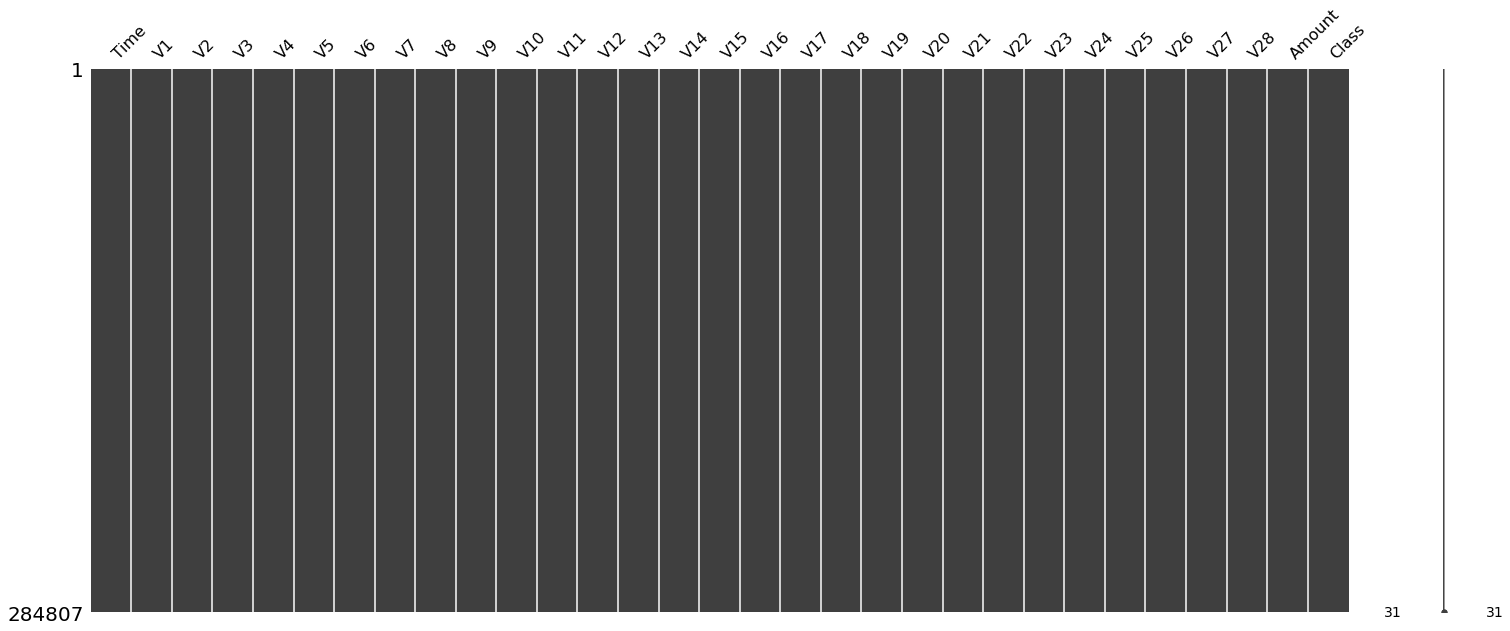

In [4]:
# 결측치 확인 
import missingno as msno 
msno.matrix(card_df)
# 결측치도 없다. 

# 만일 결측치가 존재 ---> fillna(?), interpolate 방법을 사용

In [6]:
# 데이터 프레임에서 무작위로 하나 추출 
card_df.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
71723,54421.0,-0.721774,1.081724,0.404979,-0.070432,-0.115953,-0.40893,0.470714,0.470094,-0.322949,...,-0.26131,-0.991381,0.092207,-0.68222,-0.024417,0.136765,0.087408,0.027493,69.99,0


In [7]:
# 데이터의 범위 
# describe() 사용하면 기초통계랑을 볼수 있음
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# 데이터 프레임에서 뒤에 몇개 
card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
X = card_df.drop(['Time', 'Class'],axis=1)
y = card_df.Class

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 분류 모델을 사용한다. 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train) 
y_pred = model.predict(X_test) # 예측 

from sklearn.metrics import accuracy_score
print('정확도: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

In [35]:
# 다중공선성: 독립변수들 간에 강한 상관관계가 존재하여 정확도 떨어짐
# 독립변수들 간에 상관관계를 확인하자 
import seaborn as sns # 패키지
card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [47]:
# 독립변수만 저장 
원하는컬럼 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

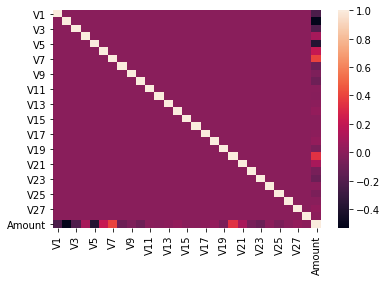

In [48]:
# 상관관계 확인 
sns.heatmap(card_df[원하는컬럼].corr())
# v2, V5 색이 어둡다 --> 지워 볼까? 

In [50]:
# 기울어진 정도(skew값)를 확인 
from scipy.stats import skew
skew(card_df['Amount'])
# skew 값이 0이  이상적 
# skew 값이 + 이면 왼쪽으로 치우쳐진 그림 
# skew 값이 - 이면 오른쪽으로 치우쳐진 그림 

16.97763503663315

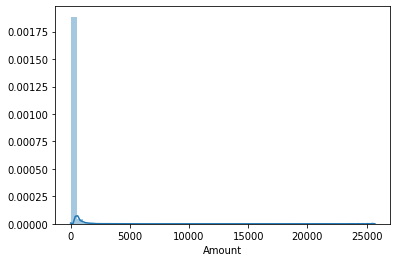

In [51]:
# 그림으로 치우쳐 있는 정도 를 확인 
sns.distplot(card_df['Amount'])

In [ ]:
# 치우침 복구 --> 
# 왼쪽으로 치우쳤으면, 로그 변환 
# 오른쪽으로 치우쳤으면, 제곱(**2), 덧셈(+10), 곱셈(*2)

In [52]:
# 로그변환 
import numpy as np 
tmp = np.log(card_df['Amount'].values+0.4)

0.1627020708288934


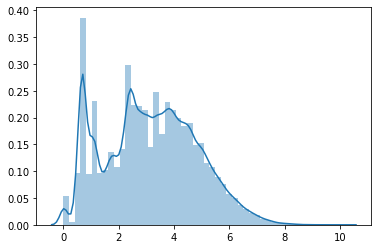

In [54]:
# skew 왜도 
print(skew(tmp))
sns.distplot(tmp)

In [56]:
card_df['log_Amount'] = tmp  # 새로운 컬럼 만들기 
card_df = card_df.drop('Amount',axis=1)

In [58]:
# 독립변수만 저장 
원하는컬럼 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'log_Amount']

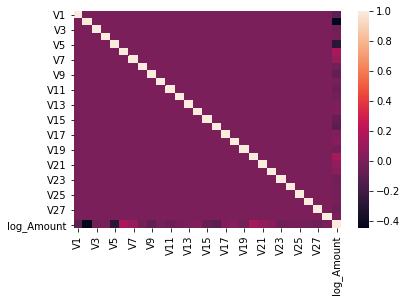

In [60]:
sns.heatmap(card_df[원하는컬럼].corr())

In [61]:
# 독립변수 v2, v5 제외 
원하는컬럼 = ['V1', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'log_Amount']

In [62]:
X = card_df[원하는컬럼]
y = card_df.Class

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 분류 모델을 사용한다. 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train) 
y_pred = model.predict(X_test) # 예측 

from sklearn.metrics import accuracy_score
print('정확도: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

정확도: 99.92%
